**Comparison of clustering algorithms:**___
By **Anwar Hashem** PhD student.
##Clustering with dataset from the UCI database

### Importing Libraries


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
import time
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch, MeanShift, AffinityPropagation
#import arff, numpy as np
from scipy.io import arff
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import homogeneity_score

from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
import zipfile

In [ ]:
# I select dataset (Dry Bean, Donated on 9/13/2020) from https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
'''
Dry Beans: Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.
A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
'''

with zipfile.ZipFile('/content/dry+bean+dataset.zip', 'r') as myzip:
  myzip.extractall('./')

file_path = "/content/DryBeanDataset/Dry_Bean_Dataset.xlsx"
file_path

In [ ]:
file_path='/content/Dry_Bean_Dataset.xlsx'
data_r = pd.read_excel(file_path)

data_r.shape # 45211,17
data_r.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045,DERMASON
1,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049,DERMASON
2,20548,524.736,183.965251,142.672388,1.289424,0.631299,20825,161.748342,0.759686,0.986699,0.937773,0.879233,0.008953,0.003300,0.773051,0.996791,DERMASON
3,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414,DERMASON
4,20786,534.717,200.927241,132.143553,1.520522,0.753307,21057,162.682381,0.789412,0.987130,0.913551,0.809658,0.009666,0.002562,0.655546,0.996773,DERMASON


In [ ]:
Ytr=data_r["Class"]
Xtr=data_r.drop(["Class"],axis=1)


Xtr_r = data_r.iloc[:, :-1].values
ytr_r = data_r.iloc[:, -1].values

Xtr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,20420,524.932,183.601165,141.886215,1.294003,0.634655,20684,161.243764,0.790187,0.987237,0.931235,0.878228,0.008991,0.003299,0.771285,0.998045
1,20464,528.408,191.249312,136.368462,1.402445,0.701123,20772,161.417391,0.747407,0.985172,0.921004,0.844016,0.009346,0.002925,0.712362,0.999049
2,20548,524.736,183.965251,142.672388,1.289424,0.631299,20825,161.748342,0.759686,0.986699,0.937773,0.879233,0.008953,0.003300,0.773051,0.996791
3,20711,525.413,186.079149,142.081680,1.309663,0.645743,20988,162.388621,0.793525,0.986802,0.942778,0.872686,0.008985,0.003214,0.761580,0.997414
4,20786,534.717,200.927241,132.143553,1.520522,0.753307,21057,162.682381,0.789412,0.987130,0.913551,0.809658,0.009666,0.002562,0.655546,0.996773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,237270,1921.685,738.144502,412.921647,1.787614,0.828895,240671,549.637650,0.784115,0.985869,0.807399,0.744621,0.003111,0.000590,0.554460,0.991160
13607,241322,1895.940,726.373493,427.370120,1.699636,0.808598,244319,554.311026,0.820823,0.987733,0.843641,0.763121,0.003010,0.000630,0.582354,0.989790
13608,248424,1884.557,715.053040,446.043618,1.603101,0.781591,251082,562.408446,0.807536,0.989414,0.878992,0.786527,0.002878,0.000679,0.618625,0.991718
13609,251432,1919.868,719.125690,450.926187,1.594775,0.778981,257425,565.803115,0.766776,0.976719,0.857211,0.786793,0.002860,0.000676,0.619043,0.987235


In [ ]:
# To describe the fields types and ensure that non-values are exists and all input data contains numeric values
data_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Enc_Ytr = le.fit_transform(Ytr)
Enc_Ytr

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
Ytr.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [ ]:
Enc_Ytr=pd.DataFrame(Enc_Ytr)
Enc_Ytr.value_counts()

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: count, dtype: int64

In [ ]:
Xtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [ ]:
from sklearn.tree import DecisionTreeRegressor
Tree_model_r= DecisionTreeRegressor(random_state=0, max_depth=5)
Tree_model_r.fit(Xtr_r, Enc_Ytr)

col_name_r=list(Xtr.columns.values)
col_name_r

#feature importance
F_import_r=Tree_model_r.feature_importances_*100
#F_import

for i in range(Xtr.shape[1]):
  print(col_name_r[i],F_import_r[i])

Area 0.0
Perimeter 18.19573678471695
MajorAxisLength 0.0
MinorAxisLength 70.50262727219884
AspectRation 0.0
Eccentricity 0.0
ConvexArea 0.0
EquivDiameter 0.0
Extent 0.03487667359594019
Solidity 0.0
roundness 3.188262702646346
Compactness 2.8793246242027304
ShapeFactor1 4.341880214884098
ShapeFactor2 0.4693329117077959
ShapeFactor3 0.3375870943164414
ShapeFactor4 0.05037172173085251


In [ ]:
#So, This is more Feauters Impotant (MinorAxisLength + Perimeter ) so we will plot MinorAxisLength and Perimeter

In [ ]:
pca=PCA(n_components=2)
X_principal= pca.fit_transform(Xtr)

X_principal

array([[-4.64682142e+04,  2.18687172e+01],
       [-4.63746165e+04,  5.26422917e+01],
       [-4.62779396e+04,  2.94782145e+01],
       ...,
       [ 2.77677997e+05, -7.78905797e+02],
       [ 2.84308038e+05,  1.51911634e+03],
       [ 2.90700525e+05,  3.34119135e+03]])

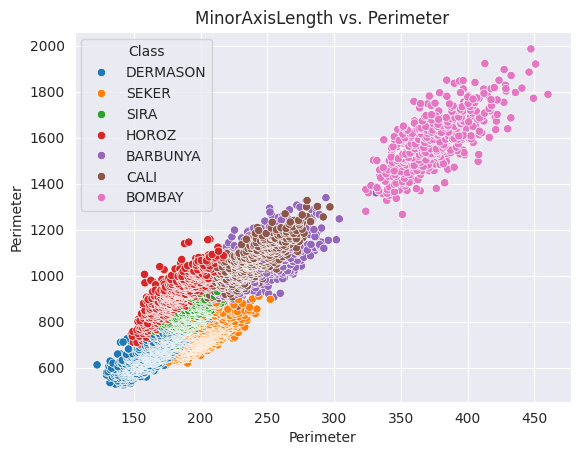

In [ ]:
#be delete (only for test)
#data_r = sns.load_dataset(data_r_path)
sns.set_style("darkgrid")

sns.scatterplot(x='MinorAxisLength' , y='Perimeter', data=data_r,hue='Class')
plt.title("MinorAxisLength vs. Perimeter")
plt.xlabel('Perimeter')


plt.show()

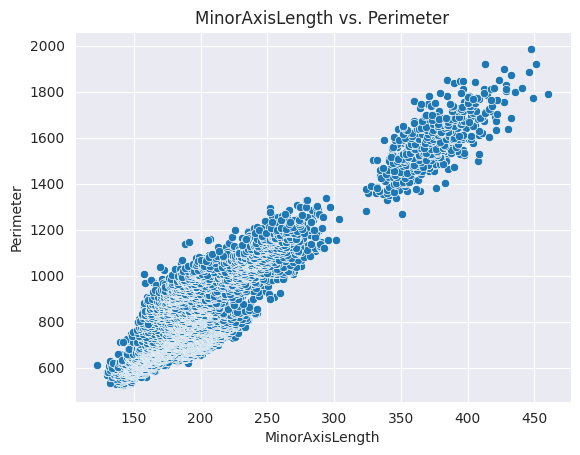

In [ ]:
#data_r = sns.load_dataset(Xtr_r)
sns.set_style("darkgrid")
sns.scatterplot(x='MinorAxisLength' , y='Perimeter', data=Xtr)
plt.title("MinorAxisLength vs. Perimeter")
#plt.xlabel('Perimeter')
plt.show()

init= Cluster=silhouette_score


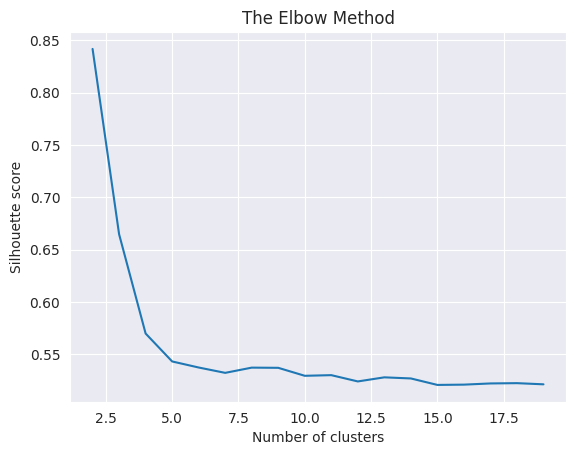

In [ ]:
# silhouette score
score_r = []
print('init= Cluster=silhouette_score')
n=20
for i in range(2,n):
  #km_r= KMeans(init='k-means++', n_clusters=i, n_init=10, random_state=0)
  km_r= KMeans(n_clusters=i)

  km_r.fit(Xtr)
  result = km_r.labels_
  #print(i , '    '  , silhouette_score(Xtr , result))
  score_r.append(silhouette_score(Xtr , result))

plt.plot(range(2,n) , score_r)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

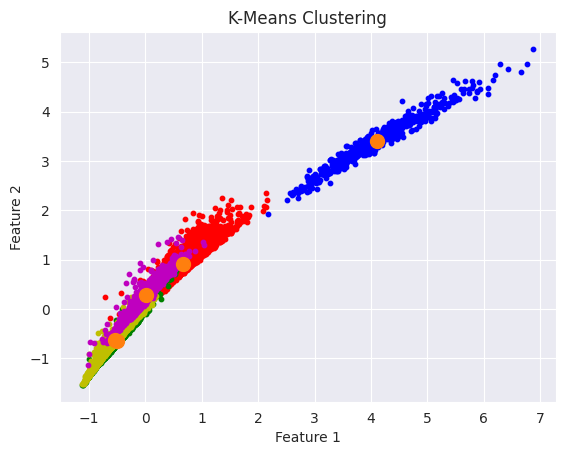

In [ ]:
# By first looking at the data plotو  we find that the appropriate value for the number of clusters is: 5
n_clusters_r=5
Xtr=StandardScaler().fit_transform(Xtr)

km_r= KMeans(n_clusters=n_clusters_r)
y_kmeans= km_r.fit_predict(Xtr)


#visualising the cluster
#Xtr_r[km_r_labels == 0, 0]
#Xtr_r[km_r_labels == 0, 1]
plt.scatter(Xtr[y_kmeans == 0, 0], Xtr[y_kmeans == 0, 1], s = 10, c = 'r')
plt.scatter(Xtr[y_kmeans == 1, 0], Xtr[y_kmeans == 1, 1], s = 10, c = 'b')
plt.scatter(Xtr[y_kmeans == 2, 0], Xtr[y_kmeans == 2, 1], s = 10, c = 'g')
plt.scatter(Xtr[y_kmeans == 3, 0], Xtr[y_kmeans == 3, 1], s = 10, c = 'y')
plt.scatter(Xtr[y_kmeans == 4, 0], Xtr[y_kmeans == 4, 1], s = 10, c = 'm')
#plt.scatter(Xtr[y_kmeans == 5, 0], Xtr[y_kmeans == 5, 1], s = 10, c = 'c')
#plt.scatter(Xtr[y_kmeans == 6, 0], Xtr[y_kmeans == 6, 1], s = 10, c = 'k')
#plt.scatter(Xtr_r[y_kmeans == 7, 0], Xtr_r[y_kmeans == 7, 1], s = 10, c = 'w')
plt.scatter(km_r.cluster_centers_[:, 0], km_r.cluster_centers_[:, 1], s = 100, c = '#ff7f0e')
# #1f77b4'

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
#plt.legend()
plt.show()

In [ ]:
# ##################################################################
# Compute DBSCAN

#Xtr=StandardScaler().fit_transform(Xtr)

#for kk in range(1,10): # min_samples=5 gives us good result, we fixed min_samples=5

#for mm in (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2):
  # eps=1.1,1.2 gives us good result(cluster 7,5 and noise=497,379), we fixed eps=1.2

  #DBSCANModel = DBSCAN(metric='euclidean',eps=0.3,min_samples=kk,algorithm='kd_tree')#it can be ball_tree, kd_tree, brute
  #DBSCANModel = DBSCAN(metric='euclidean',eps=0.3,min_samples=kk,algorithm='brute')#it can be ball_tree, kd_tree, brute
  #DBSCANModel = DBSCAN(metric='euclidean',eps=mm,min_samples=5,algorithm='auto')#it can be ball_tree, kd_tree, brute
DBSCANModel = DBSCAN(metric='euclidean',eps=1.2,min_samples=5,algorithm='auto')#it can be ball_tree, kd_tree, brute

  #DBSCANModel = DBSCAN(eps=0.3,min_samples=10)
y_pred_train = DBSCANModel.fit_predict(Xtr)
  #DBSCANModel.labels_
  #DBSCANModel = DBSCAN(eps=0.8, min_samples=10).fit(Xtr_r)
core_samples_mask = np.zeros_like(DBSCANModel.labels_, dtype=bool)
core_samples_mask[DBSCANModel.core_sample_indices_] = True
labels = DBSCANModel.labels_
labels
  #print('\n min_samples=',kk)
#print('\n eps=',mm)
print(pd.DataFrame(labels).value_counts())
  # Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

 0    12765
 2      451
-1      379
 3        6
 1        5
 4        5
Name: count, dtype: int64
Estimated number of clusters: 5
Estimated number of noise points: 379


In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
'''
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Xtr, DBSCANModel.labels_))
#print("%.6f" % homogeneity_score(Xtr, y_pred_train))

print("Completeness: %0.3f" % metrics.completeness_score(Xtr, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(Xtr, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(Xtr, labels))
#labels_true must be 1D: shape is (13611, 16)

print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(Enc_Ytr, y_pred_train,
                                           average_method='arithmetic'))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xtr, y_pred_train))
'''

Estimated number of clusters: 5
Estimated number of noise points: 379


'\nprint("Homogeneity: %0.3f" % metrics.homogeneity_score(Xtr, DBSCANModel.labels_))\n#print("%.6f" % homogeneity_score(Xtr, y_pred_train))\n\nprint("Completeness: %0.3f" % metrics.completeness_score(Xtr, labels))\nprint("V-measure: %0.3f" % metrics.v_measure_score(Xtr, labels))\nprint("Adjusted Rand Index: %0.3f"\n      % metrics.adjusted_rand_score(Xtr, labels))\n#labels_true must be 1D: shape is (13611, 16)\n\nprint("Adjusted Mutual Information: %0.3f"\n      % metrics.adjusted_mutual_info_score(Enc_Ytr, y_pred_train,\n                                           average_method=\'arithmetic\'))\n\nprint("Silhouette Coefficient: %0.3f"\n      % metrics.silhouette_score(Xtr, y_pred_train))\n'

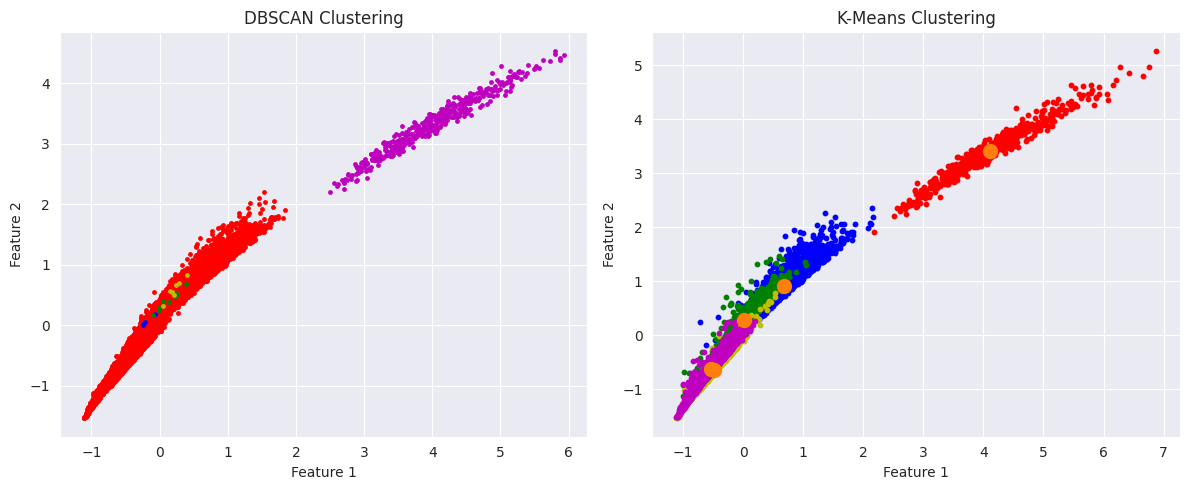

In [ ]:
#From the figure above, we find that the appropriate value for the number of clusters is: 5


# Perform K-Means clustering
#km_s = KMeans(n_clusters=7)
#km_r= KMeans(init='k-means++', n_clusters=n_clusters_r, n_init=10, random_state=0)
km_r= KMeans(n_clusters=n_clusters_r)

km_r_labels = km_r.fit_predict(Xtr)

# Plot the data points and cluster assignments for K-Means
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
#plt.scatter(Xtr_r[:, 0], Xtr_r[:, 1], c=km_r_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(Xtr[km_r_labels == 0, 0], Xtr[km_r_labels == 0, 1], s = 10, c = 'r')
plt.scatter(Xtr[km_r_labels == 1, 0], Xtr[km_r_labels == 1, 1], s = 10, c = 'b')
plt.scatter(Xtr[km_r_labels == 2, 0], Xtr[km_r_labels == 2, 1], s = 10, c = 'g')
plt.scatter(Xtr[km_r_labels == 3, 0], Xtr[km_r_labels == 3, 1], s = 10, c = 'y')
plt.scatter(Xtr[km_r_labels == 4, 0], Xtr[km_r_labels == 4, 1], s = 10, c = 'm')
plt.scatter(Xtr[km_r_labels == 5, 0], Xtr[km_r_labels == 5, 1], s = 10, c = 'c')
plt.scatter(Xtr[km_r_labels == 6, 0], Xtr[km_r_labels == 6, 1], s = 10, c = 'k')
#plt.scatter(Xtr_r[km_r_labels == 7, 0], Xtr_r[y_kmeans == 7, 1], s = 10, c = 'w')
plt.scatter(km_r.cluster_centers_[:, 0], km_r.cluster_centers_[:, 1], s = 100, c = '#ff7f0e')
# #1f77b4'

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Perform DBSCAN clustering
dbscan_r = DBSCAN(eps=1.1, min_samples=5)
dbscan_r_labels = dbscan_r.fit_predict(Xtr)

# Plot the data points and cluster assignments for DBSCAN


plt.subplot(1, 2, 1)
#plt.scatter(Xtr[:, 0], Xtr[:, 1], c=dbscan_r_labels, cmap='viridis', edgecolors='k', alpha=0.7)

plt.scatter(Xtr[dbscan_r_labels == 0, 0], Xtr[dbscan_r_labels == 0, 1], s = 6, c = 'r')
plt.scatter(Xtr[dbscan_r_labels == 1, 0], Xtr[dbscan_r_labels == 1, 1], s = 6, c = 'b')
plt.scatter(Xtr[dbscan_r_labels == 2, 0], Xtr[dbscan_r_labels == 2, 1], s = 6, c = 'g')
plt.scatter(Xtr[dbscan_r_labels == 3, 0], Xtr[dbscan_r_labels == 3, 1], s = 6, c = 'y')
plt.scatter(Xtr[dbscan_r_labels == 4, 0], Xtr[dbscan_r_labels == 4, 1], s = 6, c = 'm')
#plt.scatter(Xtr[dbscan_r_labels == 5, 0], Xtr[dbscan_r_labels == 5, 1], s = 6, c = 'c')
#plt.scatter(Xtr[dbscan_r_labels == 6, 0], Xtr[dbscan_r_labels == 6, 1], s = 6, c = 'k')
#plt.scatter(dbscan_r_labels[:, 0], dbscan_r_labels[:, 1], s = 100, c = '#ff7f0e')


plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

In [ ]:
aa=pd.DataFrame(dbscan_r_labels)
aa.value_counts()

 0    12657
-1      497
 4      427
 2       10
 3        7
 5        5
 1        4
 6        4
Name: count, dtype: int64

In [ ]:
# Define clustering algorithms

km_r=KMeans(n_clusters=n_clusters_r)
AgglomerativeClustering_r=AgglomerativeClustering(n_clusters=n_clusters_r)
DBSCAN_r=DBSCAN(eps=1.1, min_samples=5)
SpectralClustering_r=SpectralClustering(n_clusters=n_clusters_r)
Birch_r=Birch(n_clusters=n_clusters_r)
MiniBatchKMeans_r=MiniBatchKMeans(n_clusters=n_clusters_r)
MeanShift_r=MeanShift()
AffinityPropagation_r =AffinityPropagation()

Models=[km_r,AgglomerativeClustering_r,DBSCAN_r,SpectralClustering_r,Birch_r,MiniBatchKMeans_r,MeanShift_r,AffinityPropagation_r]

# Compare clustering algorithms
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Comparison of Clustering Algorithms')

ModelsScore = {}
# for all models above
for Model in Models:
  labels = Model.fit_predict(Xtr)
  # Plot the results
  plt.scatter(Xtr[:, 0], Xtr[:, 1], c=labels, cmap='viridis', edgecolors='k')
  plt.title(Model)
  #plt.flatten.axis('off')
  plt.show()

In [ ]:
# Define clustering algorithms

km_r=KMeans(n_clusters=n_clusters_r)
AgglomerativeClustering_r=AgglomerativeClustering(n_clusters=n_clusters_r)
DBSCAN_r=DBSCAN(eps=1.1, min_samples=5)
SpectralClustering_r=SpectralClustering(n_clusters=n_clusters_r)
Birch_r=Birch(n_clusters=n_clusters_r)
MiniBatchKMeans_r=MiniBatchKMeans(n_clusters=n_clusters_r)
MeanShift_r=MeanShift()
AffinityPropagation_r =AffinityPropagation()

Models=[km_r,AgglomerativeClustering_r,DBSCAN_r,SpectralClustering_r,Birch_r,MiniBatchKMeans_r,MeanShift_r,AffinityPropagation_r]

# Compare clustering algorithms
ModelsScore = {}
score_r = []
# for all models above
print('silhouette_score Of Models')
for Model in Models:
  labels = Model.fit_predict(Xtr)

  result = Model.labels_

  print(Model , '    '  , silhouette_score(Xtr , result))
  score_r.append(silhouette_score(Xtr , result))

The above results show that
- DBSCAN algorithm is more accurate(silhouette_score=10.7), but it deleted several data and considered it an outlier. Next comes AffinityPropagation (silhouette_score=13).
- SpectralClustering and MeanShift are less accurate (silhouette_score=49).
- The results of KMeans,Birch,MiniBatchKMeans,AgglomerativeClustering
are close (silhouette_score=30)

In [ ]:
#----------------------------------------------------

#Applying PCAModel Model

'''
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False,svd_solver='auto’, tol=0.0,
                          iterated_power='auto’, random_state=None)
'''

PCAModel = PCA(n_components=2, svd_solver='auto')#it can be full,arpack,randomized
PCAModel.fit(Xtr)

#Calculating Details
print('PCAModel Train Score is : ' , PCAModel.score(Xtr))
print('PCAModel No. of components is : ' , PCAModel.components_)
print('PCAModel Explained Variance is : ' , PCAModel.explained_variance_)
print('PCAModel Explained Variance ratio is : ' , PCAModel.explained_variance_ratio_)
print('PCAModel singular value is : ' , PCAModel.singular_values_)
print('PCAModel mean is : ' , PCAModel.mean_)
print('PCAModel noise variance is : ' , PCAModel.noise_variance_)

PCAModel Train Score is :  -13.486505335134517
PCAModel No. of components is :  [[ 0.28245796  0.31089112  0.32582398  0.23619938  0.22929833  0.23152605
   0.28319989  0.29748384 -0.05980796 -0.14301631 -0.24816481 -0.238378
  -0.2213189  -0.31462459 -0.2389833  -0.19800943]
 [ 0.24588202  0.17930292  0.10075652  0.34346065 -0.33084419 -0.31943388
   0.24463007  0.22280218  0.22061926  0.10332234  0.21480528  0.32891436
  -0.33254851  0.12941924  0.32752166  0.10006108]]
PCAModel Explained Variance is :  [8.87528224 4.22926643]
PCAModel Explained Variance ratio is :  [0.55466439 0.26430973]
PCAModel singular value is :  [347.55228578 239.91731107]
PCAModel mean is :  [ 0.00000000e+00  6.68205644e-17 -6.68205644e-17  3.34102822e-17
  3.34102822e-17  0.00000000e+00 -6.68205644e-17 -6.68205644e-17
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
PCAModel noise variance is :  0.2069019234664275


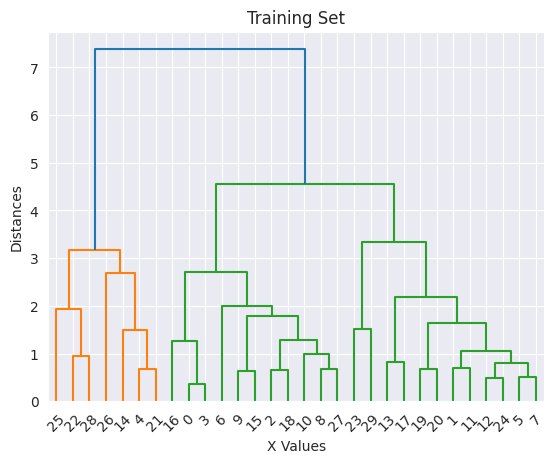

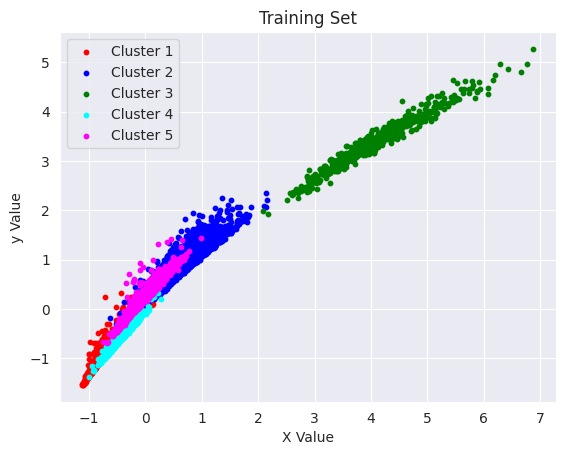

In [ ]:
#----------------------------------------------------

#Applying AggClusteringModel Model

'''
sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean’, memory=None, connectivity=None,
                                        compute_full_tree='auto’, linkage=’ward’,pooling_func=’deprecated’)
'''

AggClusteringModel = AgglomerativeClustering(n_clusters=5,affinity='euclidean',# it can be l1,l2,manhattan,cosine,precomputed
                                             linkage='ward')# it can be complete,average,single

y_pred_train = AggClusteringModel.fit_predict(Xtr)

#draw the Hierarchical graph for Training set
dendrogram = sch.dendrogram(sch.linkage(Xtr[: 30,:], method = 'ward'))# it can be complete,average,single
plt.title('Training Set')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()


#draw the Scatter for Train set
plt.scatter(Xtr[y_pred_train == 0, 0], Xtr[y_pred_train == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(Xtr[y_pred_train == 1, 0], Xtr[y_pred_train == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(Xtr[y_pred_train == 2, 0], Xtr[y_pred_train == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(Xtr[y_pred_train == 3, 0], Xtr[y_pred_train == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(Xtr[y_pred_train == 4, 0], Xtr[y_pred_train == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.title('Training Set')
plt.xlabel('X Value')
plt.ylabel('y Value')
plt.legend()
plt.show()

plt.show()

#**Conclusion:**
#1- DBSCAN is most efficient among other algorithms in determining the accuracy of the number of clusters.
# 2- The key advantage of DBSCAN is its ability to identify clusters of arbitrary shapes and handle noise effectively.
# 3- After applying PCA's algorithm, the algorithms gave better accuracy.
# 4- There is almost no difference between KMeans algorithm and MiniBatchKMeans algorithm in terms of results, except that MiniBatchKMeans algorithm is slightly faster.


#So, in most cases we can use several algorithms to reach the most efficient model, as follows:
# - PCA Algorithm for Reduction for data.
# - DBSCAN for Remove Outlier and preprocessing
# - KMeans for Clustering
# - Logistic for Classification
# - Logistic Regression fro prediction
